In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [23]:
data = np.load('../data/smoke/smoke_medium.npz', allow_pickle=True)

In [24]:
data_params = data['log_params'].item()
data_log_density = data['log_density']
data_log_velocity = data['log_velocity']
data_log_condition = data['log_condition']

In [25]:
data_params

{'resolution_x': 64,
 'resolution_y': 96,
 'num_frames': 200,
 'time_step': 0.25,
 'num_src_pos_x': 6,
 'num_src_pos_y': 6,
 'data_save_path': '../data/smoke/smoke_medium.npz',
 'src_radius': 2,
 'src_strength': 0.5}

In [26]:
time = 32.0
assert time < 50.0
density = torch.from_numpy(data_log_density[int(time/data_params["time_step"]), ...])
print(density.shape)

torch.Size([36, 96, 64])


Text(0.5, 1.0, 'Smoke density at time 32.0 s')

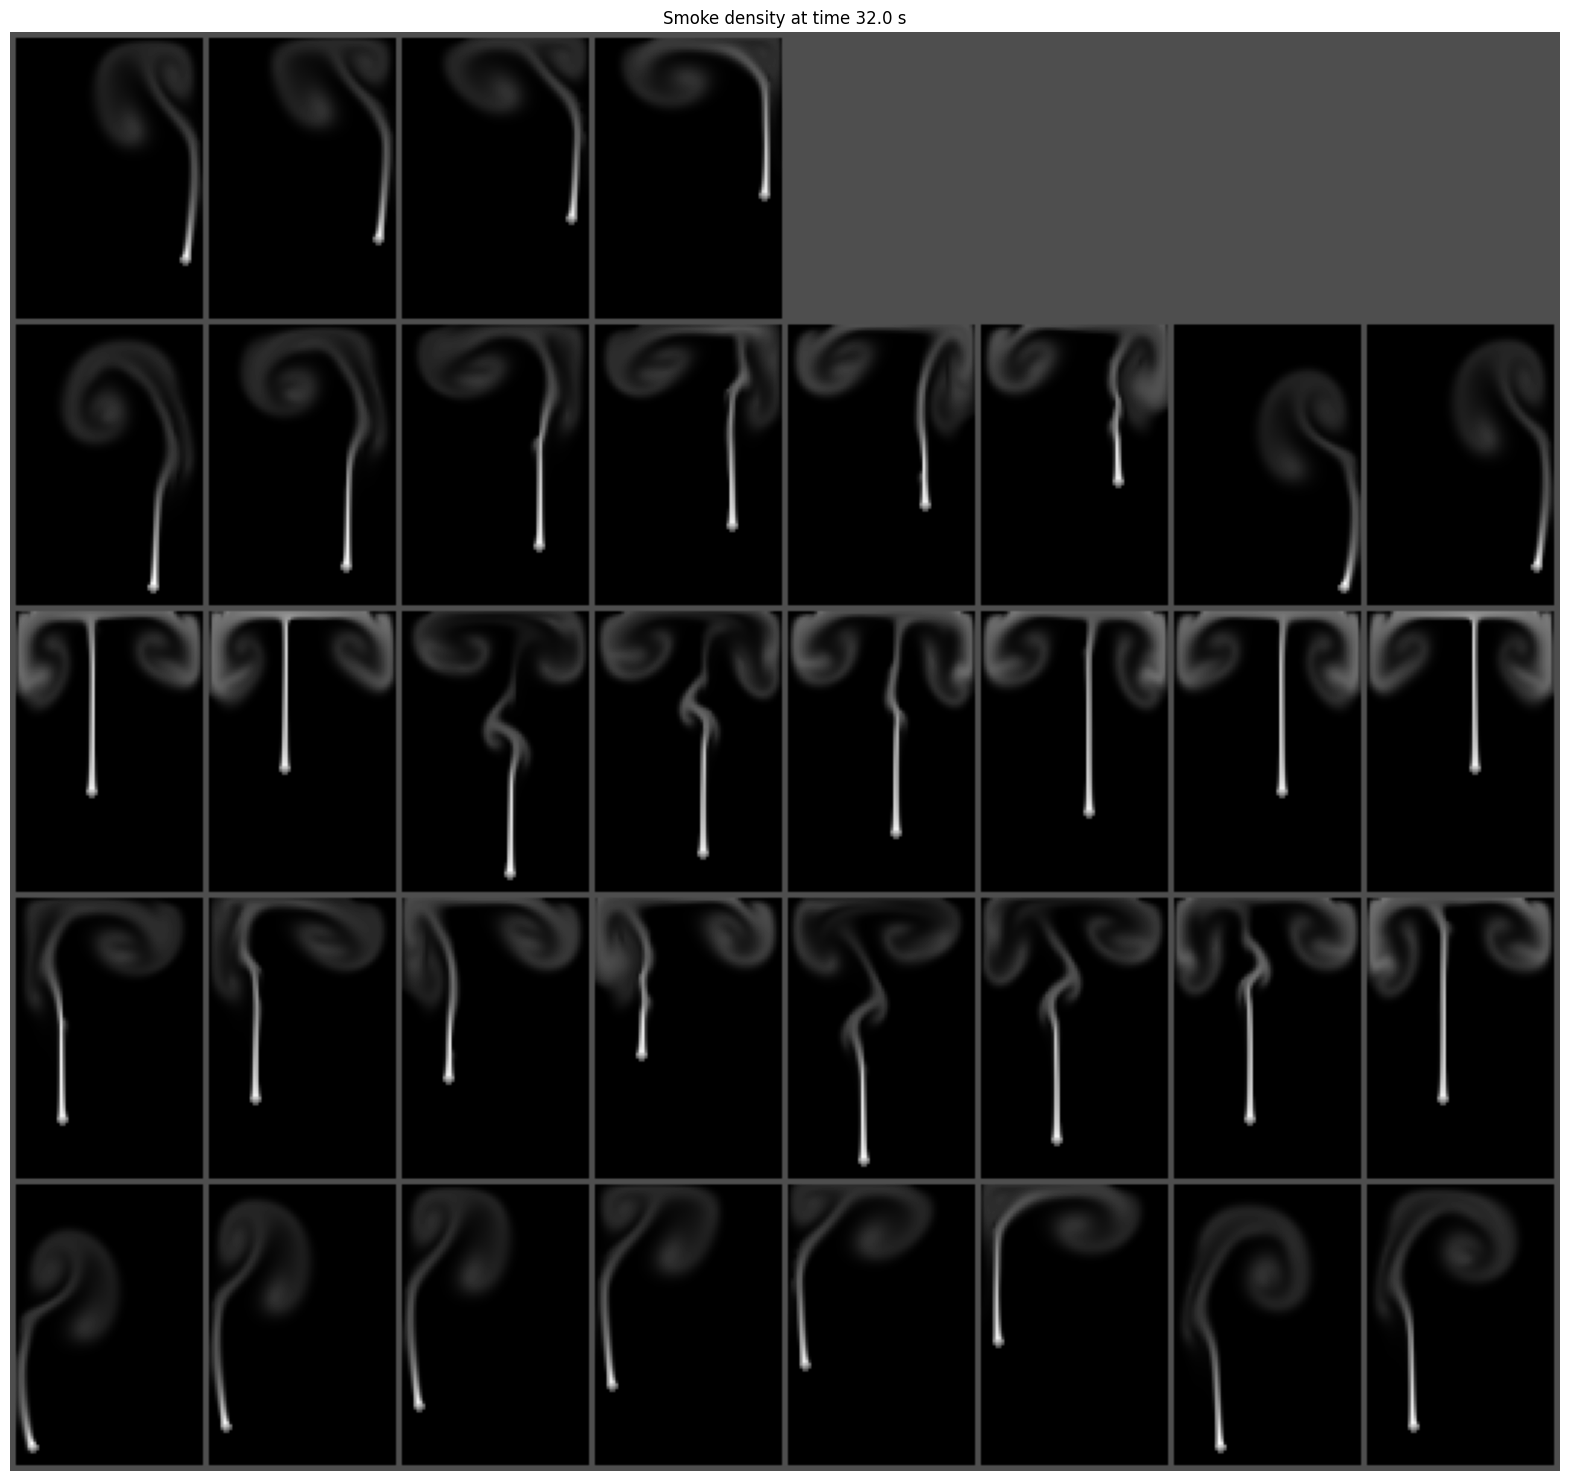

In [27]:
grid = torchvision.utils.make_grid(density.unsqueeze(1), nrow=8, padding=2, normalize=False, pad_value=1.0)
plt.figure(figsize=(20, 20))
plt.imshow(grid.detach().numpy()[0, ...], cmap='gray', origin='lower')
plt.axis('off')
plt.title(f'Smoke density at time {time:.1f} s')